## 3.Colab에서 한글 폰트 사용하기

In [ ]:
###########폰트 라이브러리 불러오기#############
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

!sudo apt-get install -qq -y fonts-nanum

%config InlineBackend.figure_format = 'retina'
sys_font=fm.findSystemFonts()
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
mpl.font_manager._rebuild()
print('설치가 되었습니다.')

In [ ]:
# 위의 코드 실행 후 colab 메뉴에서 '런타임' -> '런타임 다시 시작' 실행

In [ ]:
####### 런타임 다시 시작 후 실행 #######
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns

plt.rcParams['font.family']='NanumGothic'  #폰트 설정
fm._rebuild()
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

### Jupyter Notebook (Local 환경)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False 
plt.rc('font', family='NanumGothic')
#plt.rc('font', family='Malgun Gothic')
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

## 4.Pandas의 plot 기능
- https://pandas.pydata.org/docs/user_guide/visualization.html

- df.plot(kind='xxx')
   - kind : line, bar, pie, hist, kde, box, scatter, area 등
- df.plot.xxx()
   - xxx : kind의 종류를 적음
   - 예) df.plot.bar() 

- DataFrame, Series
- ```DataFrame.plot(*args, **kwargs)```
- ```Series.plot(*args, **kwargs)```
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html
- 주요 parameter
  - x : DataFrame일 경우 사용됨
  - y : DataFrame일 경우 사용됨
  - kind : 'line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter'(DataFrame only)
  - layout: (row, column)의 튜플로 subplot의 shape 지정
  - subplots : bool, default False, 각 컬럼을 subplots로 분리함
  - sharex, sharey : subplots=True 인 경우 가용
  - figsize : tuple, (width, height) in inches
  - use_index : bool, default True (index를 x축의 ticks로 사용)
  - title : 제목
  - grid : bool, default None, 눈금선
  - legend : bool
  - style : stylelist or dict, The matplotlib line style per column.
  - xticks : sequence (xticks로 사용할 값들)
  - yticks : sequence (yticks로 사용할 값들)
  - xlim, ylim : x, y에 대한 limitation 
  - xlabel, ylable : x, y축에 대한 이름 
  - rot : int, Rotation for ticks
  - fontsize : int, xticks, yticks에 대한 폰트 크기
  - stacked : bool, default False in line and bar plots, True in area plot
  - sort_columns : bool, column names 정렬
  - secondary_y : bool, 2중축


### 4-01. Line plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 4-01-01.사용할 DataFrame 준비

In [ ]:
import pandas as pd
data = {'국가': ['대한민국','미국', '중국', '호주'],
        '1분기': [60, 70, 80, 70],
        '2분기': [70, 72, 78, 75],
        '3분기': [80, 75, 80, 80],
        '4분기': [90, 80, 82, 85]}

df = pd.DataFrame(data)
df.index = [3,4,5,6]
dfidx = df.set_index('국가')

In [ ]:
df

,국가,1분기,2분기,3분기,4분기
3,대한민국,60,70,80,90
4,미국,70,72,75,80
5,중국,80,78,80,82
6,호주,70,75,80,85


In [ ]:
dfidx

,1분기,2분기,3분기,4분기
국가,,,,
대한민국,60,70,80,90
미국,70,72,75,80
중국,80,78,80,82
호주,70,75,80,85


In [ ]:
dfidx['1분기']

국가
대한민국    60
미국      70
중국      80
호주      70
Name: 1분기, dtype: int64

#### 4-01-02.x, y축, style 지정하기

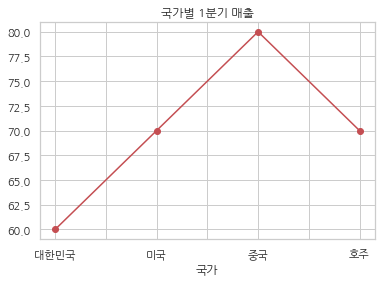

In [ ]:
# [1] 선그래프 - x, y 축을 지정한다 
# (x축 : '국가', y축 : '1분기', style : 'ro-')
df.plot.line(x='국가', y='1분기', style='ro-', legend=False, title='국가별 1분기 매출')
#dfidx['1분기'].plot.line(title='국가별 1분기 매출', style='ro-')
plt.show()

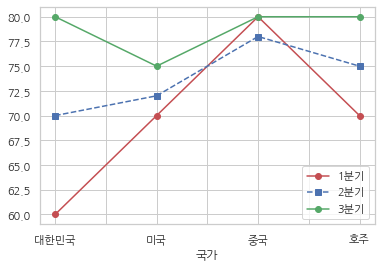

In [ ]:
# [2] 선그래프 - x축과 복수 개의 y축을 지정한다
# (x축 : '국가', y축 : ['1분기', '2분기', '3분기'],
#  style : ['ro-', 'bs--', 'go-'])
df.plot(kind='line', x='국가', 
        y=['1분기', '2분기', '3분기'], 
        style=['ro-', 'bs--', 'go-'])
plt.show()

Index(['대한민국', '미국', '중국', '호주'], dtype='object', name='국가')


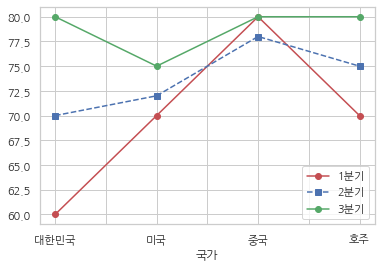

In [ ]:
# [3] 선그래프 
# index를 x축으로 사용하고, y축을 지정하는 경우
# dfidx 를 사용하고, x축 생략, y, style 지정
print(dfidx.index)
dfidx.plot.line(y=['1분기', '2분기', '3분기'], 
                style=['ro-', 'bs--', 'go-'])
plt.show()

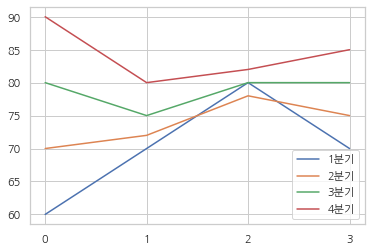

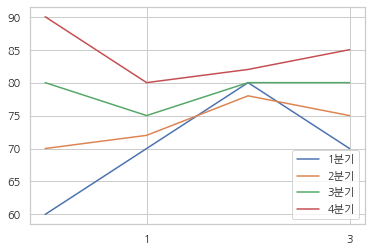

In [ ]:
# [4] DataFrame의 모든 숫자형 컬럼에 대해 선 그래프를 그림
# use_index=True가 기본값 이므로 x축 지정이 없을 때 x축은 index가 사용됨
# use_index=False를 사용하면 x축은 0, 1, 2, 3, ...이 사용됨
# 표시되는 눈금을 xticks를 사용해 지정 할 수 있음
# use_index=False, xticks=[0,1,2,3]
df.plot.line(use_index=False, xticks=[0, 1, 2, 3])
dfidx.plot.line(use_index=False, xticks=[1, 3])
plt.show()

In [ ]:
# [5] DataFrame에서 행/열 바꾸기  (DataFrame.T)
dfT = dfidx.T
dfT['합계'] = dfT.loc[:, '대한민국':'호주'].sum(axis=1)
dfT

국가,대한민국,미국,중국,호주,합계
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


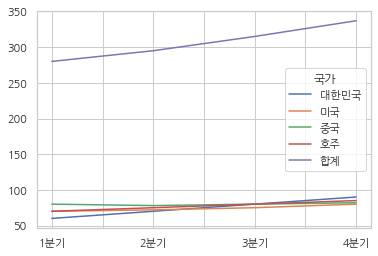

In [ ]:
# [6] dfT를 사용하여 선그래프 그리기
# x축은 index, y축은 다른 모든 컬럼을 사용함
dfT.plot.line()
plt.show()

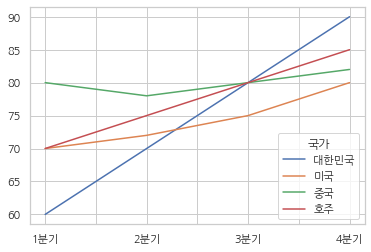

In [ ]:
# [7] dfT를 사용하여 선그래프 그리기
# x축 생략, y축은 ['대한민국', '미국', '중국', '호주']를 사용함
dfT.plot.line(y=['대한민국', '미국', '중국', '호주'])
plt.show()

In [ ]:
print(dfidx.index, dfT.index, sep='\n')

Index(['대한민국', '미국', '중국', '호주'], dtype='object', name='국가')
Index(['1분기', '2분기', '3분기', '4분기'], dtype='object')


In [ ]:
dfT

국가,대한민국,미국,중국,호주,합계
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


#### 4-01-03.이중축 차트

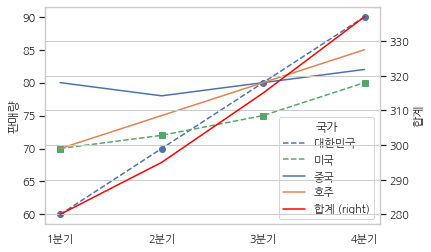

In [ ]:
# [8] 2중축 차트 - 합계를 두 번째 y축으로 지정함
# 기본축 차트 : x축 생략, y축 : ['대한민국', '미국', '중국', '호주']
# 보조축 차트 : y축 : '합계', ax를 기본축으로 지정, color:'red', secondary_y=True
ax1 = dfT.plot.line(y=['대한민국', '미국', '중국', '호주'],
                    style={'대한민국':'bo--', '미국':'gs--'})
ax2 = dfT.plot.line(y='합계', ax=ax1, color='red', secondary_y=True)

# ax.set_ylabel(레이블)을 사용해 y축 레이블을 설정함
ax1.set_ylabel('판매량')
ax2.set_ylabel('합계')
plt.show()

### 4-02. Bar plot

In [ ]:
df

,국가,1분기,2분기,3분기,4분기
3,대한민국,60,70,80,90
4,미국,70,72,75,80
5,중국,80,78,80,82
6,호주,70,75,80,85


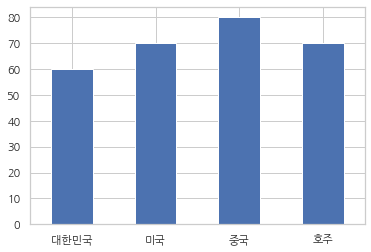

In [ ]:
# [9] 바(bar)그래프 - x축을 '국가', y축을 '1분기'로 사용
# rot=0, xlabel='', legend=False를 사용하여 
# label 표시 변경, 불필요한 내용 제거
df.plot.bar(x='국가', y='1분기', rot=0, xlabel='', legend=False)
plt.show()

#### 4-02-01.xlabel, rot, fontsize 사용

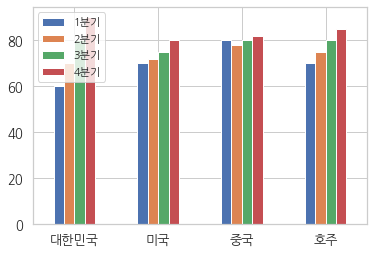

In [ ]:
# [10] 바(bar)그래프- 국가별 1~4분기 매출
# x축: '국가', y축 : ['1분기', '2분기', '3분기', '4분기']
# xlabel, rot, fontsize 사용하기
df.plot.bar(x='국가', y=['1분기', '2분기', '3분기', '4분기'],
            xlabel='', rot=0, fontsize=13)

plt.show()

In [ ]:
dfT.index.name = '분기'
dfT

국가,대한민국,미국,중국,호주,합계
분기,,,,,
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


#### 4-02-02.ylim 사용

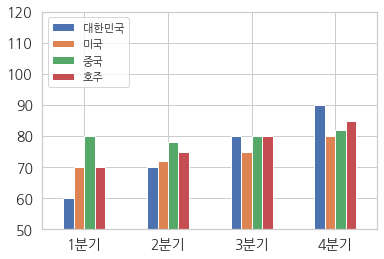

In [ ]:
# [11] 바(bar)그래프- 분기별 국가들의 매출
# x축: '분기', y축 : ['대한민국', '미국', '중국', '호주']
# ylim 사용하여 범례 및 데이터 표시 ylim=(50, 100)
dfT.plot.bar(y=['대한민국', '미국', '중국', '호주'], ylim=(50, 120),
             rot=0, fontsize=14, xlabel='')
plt.legend(loc='upper left')
plt.show()

#### 4-02-03.Stacked Bar 그래프

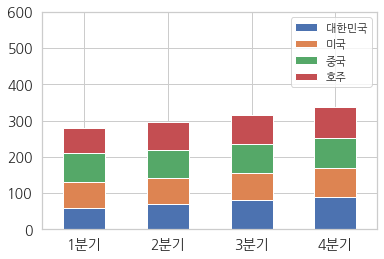

In [ ]:
# [12] Stacked Bar그래프 - 분기별 국가들의 매출
# stacked=True의 사용으로 쌓인 형태로 표시
dfT.plot.bar(y=['대한민국', '미국', '중국', '호주'], xlabel='',
             rot=0, fontsize=14, ylim=(0, 600), stacked=True)
plt.legend(loc='best')
plt.show()

### 4-03. Pie plot
- 범례 위치 : https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart

In [ ]:
dfT

국가,대한민국,미국,중국,호주,합계
분기,,,,,
1분기,60,70,80,70,280
2분기,70,72,78,75,295
3분기,80,75,80,80,315
4분기,90,80,82,85,337


In [ ]:
s = dfT['대한민국']
s

분기
1분기    60
2분기    70
3분기    80
4분기    90
Name: 대한민국, dtype: int64

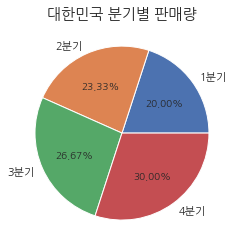

In [ ]:
# [13] Pie 그래프 - Series 사용 
# autopct 사용, ylabel 제거
s.plot.pie(autopct='%.2f%%', ylabel='')
plt.title('대한민국 분기별 판매량', fontsize=15)
plt.show()

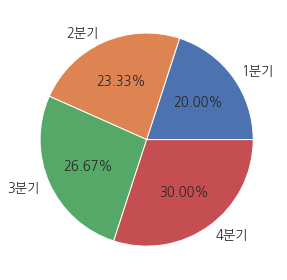

In [ ]:
# [14] Pie 그래프 - DataFrame 사용 
dfT.plot.pie(y='대한민국', fontsize=13, 
             autopct='%.2f%%', ylabel='', legend=False)
plt.tight_layout()
plt.show()

### 4-04. 히스토그램(histogram)

In [ ]:
# 데이터 준비하기
import seaborn as sns
iris = sns.load_dataset("iris")  # 붓꽂 데이터
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


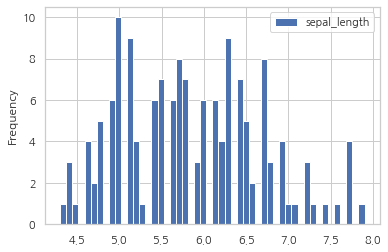

In [ ]:
# [15] 특정 컬럼에 대해 히스토그램 그리기
# y축 : sepal_length, bins : 50
iris.plot.hist(y='sepal_length', bins=50)
plt.show()

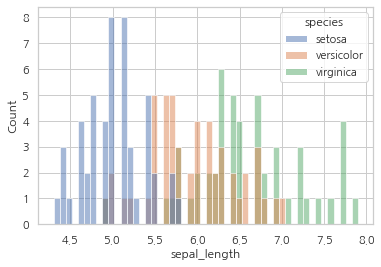

In [ ]:
# [16] seaborn으로 특정 컬럼에 대해 범주별 히스토그램 그리기
# data : iris, x축 : 'sepal_length', hue : 'species', bins : 50, alpha:0.5
sns.histplot(data=iris, x='sepal_length', hue='species', 
             bins=50, alpha=0.5)

plt.show()

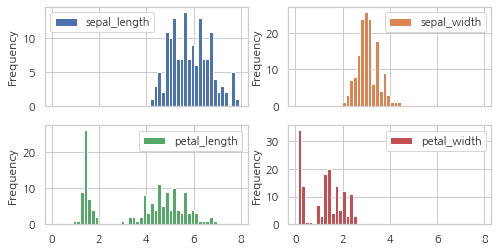

In [ ]:
# [17] 컬럼별 히스토그램 그리기
# bins : 50, layout : (2,2), subplots=True, figsize=(8, 4)
iris.plot.hist(bins=50, layout=(2,2), subplots=True, figsize=(8, 4))
plt.show()

### 4-05. Box plot

In [ ]:
# 붓꽂 데이터 불러오기
iris = sns.load_dataset("iris")  

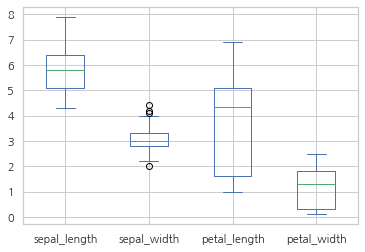

In [ ]:
# [18] iris 데이터에 대한 Box plot 그리기
iris.plot.box()
plt.grid(True)
plt.show()

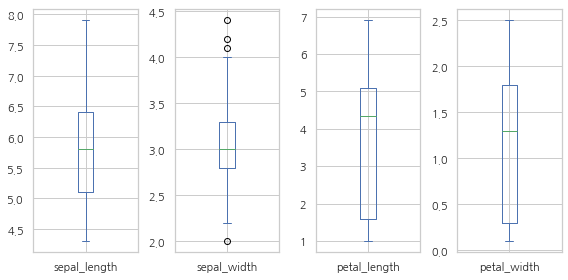

In [ ]:
# [19] iris 데이터에 대한 Box plot 그리기
# subplots로 열 별 출력, figsize=(8, 4) 사용
iris.plot(kind='box', subplots=True, figsize=(8, 4))
plt.tight_layout()
plt.show()

## 5.Plotly의 사용

### 5-01.Plotly 특징
* 홈페이지 : https://plotly.com/python
* Interactive graph 생성 : 한 위치의 값이 무엇인지 파악하거나 패널데이터를 시각화 하기 좋음
* JSON 형식으로 데이터 저장
* 벡터 이미지, 래스터 이미지로 Export 가능
-  Python으로 만들어진 Graph 라이브러리, matplotlib의 대체할 수 있음
- Scatter, Line, Area, Bar chart, Histogram, Polar 등의 기본 그래프와 Animation, Heatmap, Tree map 등의 다양한 그래프 지원
- MIT 라이선스의 Open Source, 무료임
- 인터랙티브하게 시각화를 할 수 가 있어 
- 그래프 그리는 두 가지 방법
  - 빠르게 사용할수있는 plotly.express
  - object oriented API로 세세하게 시각화 할 수 있는 plotly.graph_objects




### 5-02.라이브러리 import

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import plotly
plotly.__version__

'5.8.0'

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px  # 빠르게 사용

### 5-03.데이터 셋 가져오기

In [ ]:
!git clone http://github.com/Soyoung-Yoon/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
# [1] 데이터 셋 가져오기
import shelve
with shelve.open('visualization/plotly_data') as data:
    print(list(data.keys()))
    gapminder_2007 = data['gapminder_2007']
    gapminder = data['gapminder']
    tips = data['tips']
    iris = data['iris']

['aapl', 'gapminder_asia', 'tips', 'wind', 'gapminder_2007', 'gapminder', 'iris']


#### **gapminder 데이터 셋**
- 국가별 경제 수준과 의료 수준 동향을 정리한 DataSet
- country : 142개 국가명
- continent : 국가가 속한 대륙
- year : 1952 ~ 2007년, 5년씩 증가하는 값 
- lifeExp : 평균 기대 수명
- pop : 인구
- gdpPercap : 1인당 GDP (US$, inflation-adjusted)
- iso_alpha : 3글자 국가 코드
   - https://www.nationsonline.org/oneworld/country_code_list.htm
- iso_num : 국가 번호   

#### **gapminder_2007**
- gapminder 데이터 중 2007년 데이터

#### **tips 데이터 셋**
- 식당의 매출 관련 데이터
- total_bill : 매출 금액
- tip : 팁 금액
- sex : 성별
- smoker : 흡연여부
- day : 요일
- time : 점심/저녁
- size : 테이블의 손님 수

#### **iris 데이터 셋**

세 가지 품종의 iris 꽃에 대한 꽃잎, 꽃받침의 길이, 너비 정보
- sepal_length : 꽃받침 길이
- sepal_width : 꽃받침 너비
- petal_length : 꽃잎 길이
- petal_width : 꽃잎 너비
- species : 품종 ['setosa', 'versicolor', 'virginica']

### 5-04.산점도(Scatter Plots)

- 관계 시각화의 대표적인 차트
- 데이터에서의 관계를 시각화하는 데 적합
- 각 마커(범, 사각형, 플러스 기호)는 관측치를, 마커의 위치는 각 관측치에 대한 값을 나타냄
- **점들이 오른쪽 위로 올라가는 추세를 보인다면 양의 상관관계, 오른쪽 아래로 떨어지는 추세를 보인다면 음의 상관관계임**
- 점의 배치에 패턴이 보이지 않으면 상관 관계가 없는 것
- 데이터가 많을 때 특히 유용하며, 데이터 수가 적을 경우는 막대나 표가 정보를 제대로 표시하는데 효과적일 수 있음
- https://plotly.com/python-api-reference/generated/plotly.express.scatter.html#plotly.express.scatter

Plotly Express 사용
- fig = px.scatter(데이터셋, x='x축으로 사용할 컬럼명', y='y축으로 사용할 컬럼명)

px.scatter(**data_frame=None, x=None, y=None**, color=None, symbol=None, size=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, size_max=None, marginal_x=None, marginal_y=None, trendline=None, trendline_options=None, trendline_color_override=None, trendline_scope='trace', log_x=False, log_y=False, range_x=None, range_y=None, render_mode='auto', title=None, template=None, width=None, height=None)

In a scatter plot, each row of `data_frame` is represented by a symbol
        mark in 2D space

##### 1) x, y

In [ ]:
# [2] iris 데이터의 
# 'sepal_width', 'sepal_length'를 
# 각각 x, y로 사용하여 산점도 그리기
fig = px.scatter(iris,
           x='sepal_width', y='sepal_length')
fig.show(renderer="colab")  # jupyter notebook - "notebook"

In [ ]:
# [3] fig는 Figure 객체로 JSON 형식의 데이터
print(fig)

Figure({
    'data': [{'hovertemplate': 'sepal_width=%{x}<br>sepal_length=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. , 3. ,
                          4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5,
                          3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3,
                          3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8,
                          3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5,
                          3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7,
                          3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6, 3. , 2.

##### 2) title, color, size, hover_data

**px.scatter(title='제목')**
- title : 차트의 제목

**px.scatter(color='컬럼명', size='컬럼명', hover_data=['컬럼명'...])**

column label을 사용하여 다음의 옵션을 지정할 수 있음
- color : 값별 다른 색 지정
- size : 동그라미의 크기 지정
- hover_data : 마우스를 올려놓았을 때 나타나는 정보, 목록으로 묶어서 전달해야 함



hover : 마우스를 올려놓았을 때 x, y, color, size, hover_data에 포함된 내용이 모두 표시됨

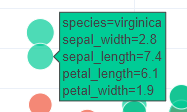

legend 에서 특정 범주만 선택하거나 선택해지 할 수 있음 (클릭으로 Toggle)

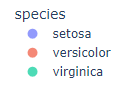

In [ ]:
help(px.scatter)

In [ ]:
# [4] iris 데이터의 'sepal_width', 'sepal_length'를 
# 각각 x, y로 사용하여 산점도 그리기
fig = px.scatter(iris, x='sepal_width', y='sepal_length',
                 color='species', size='petal_length', 
                 hover_data=['petal_width'],
                 title='IRIS Data Scatter Plot')
fig.show(renderer="colab")

##### 3) trendline, hover_name, log_x, size_max

- trendline : 트랜드 라인을 표시함
- hover_name : 마우스를 올려놓았을 때 나타나는 정보의 title
- log_x : x축 데이터의 스케일을 log로 변경 (True), 작은 값에 많이 몰려 있는 것을 펼쳐 보이도록함
- size_max : size의 최대 크기

In [ ]:
# [5] gapminder_2007년 데이터를 사용하여 x='gdpPercap', y='lifeExp'에 대한 산점도 + 트랜드 정보
fig = px.scatter(gapminder_2007, x='gdpPercap', y='lifeExp', color='continent',
                 trendline='lowess', hover_name='country')
fig.show(renderer="colab")

In [ ]:
# [6] gapminder_2007년 데이터를 사용하여 'gdpPercap', 'lifeExp'에 대한 산점도를 그려봄
# x축에 log 스케일 적용 (작은 값에 많이 몰려 있는 것을 펼쳐 보이도록 할 수 있음)
fig = px.scatter(gapminder_2007, x='gdpPercap', y='lifeExp', color='continent',
                 size='pop', size_max=60,
                 trendline='lowess', hover_name='country', log_x=True)
fig.show(renderer="colab")

##### 4) facet_row, facet_col

차트를 나누어 그리는 기준 지정 (주로 범주형 사용)
- facet_row : 행 방향 기준 지정
- facet_col : 열 방향 기준 지정

In [ ]:
# [7] tips에 대해 x축 'total_bill', y축 'tip', color를 'sex', facet_col을 'day'로 지정
# facet_col을 facet_row로 수정도 해볼 것
fig = px.scatter(tips, x='total_bill', y='tip', color='sex', facet_col='day')

fig.show(renderer="colab")

##### 5) facet_col_wrap

- log_x, log_y : x 또는 y축의 값을 log값으로 변환해서 표시함
- facet_col_wrap : 한 개 행에 표시될 열을 지정 (facet_col과 함께 사용)


In [ ]:
# [8] gapminder 데이터에서 x='gdpPercap', y='lifeExp' 지정, log_x를 True로, facet_col_wrap=3로 지정

fig = px.scatter(gapminder, x='gdpPercap', y='lifeExp', log_x=True,
                 size='pop', size_max=40, color='continent',
                 hover_name='country', facet_col='year', facet_col_wrap=3)
fig.update_layout(height=1000)
fig.show(renderer="colab")

### 5-05.막대 차트(Bar Charts)
- https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar

plotly.express.bar(data_frame=None, x=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, text=None, base=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, pattern_shape_sequence=None, pattern_shape_map=None, range_color=None, color_continuous_midpoint=None, opacity=None, orientation=None, barmode='relative', log_x=False, log_y=False, range_x=None, range_y=None, text_auto=False, title=None, template=None, width=None, height=None)

In [ ]:
# [9] gapminder에서 'Korea, Rep.'에 대한 데이터만 추출함
gapminder_korea = gapminder.query('country == "Korea, Rep."')
gapminder_korea.head(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226,KOR,410
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537,KOR,410
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387,KOR,410


In [ ]:
# [10] gapminder_korea를 사용하여 년도별 인구 증가에 대한 bar차트 그리기
fig = px.bar(gapminder_korea, x='year', y='pop')
fig.show(renderer="colab")

In [ ]:
# [11] gapminder_korea를 사용하여 년도별 인구 증가에 대한 bar차트 그리기
# hover_data로 'lifeExp', 'gdpPercap'를 지정하고, 색상을 'lifeExp'로 지정함
fig = px.bar(gapminder_korea, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp')
fig.show(renderer="colab")

##### 1) barmode 변경
- px.bar(barmode='group'): One of 'group', 'overlay' or 'relative' In 'relative' mode, bars are stacked above zero for positive values and below zero for negative values. In 'overlay' mode, bars are drawn on top of one another. In 'group' mode, bars are placed beside each other.


In [ ]:
# [12] tips 데이터에서 성별별 total_bill을
# 막대 그래프로 그림
# color를 'time'으로 사용함
# 기본 barmode ('relative') -> stacked bar
fig = px.bar(tips, x='sex', y='total_bill', color='time', 
             barmode='relative', height=400)
fig.show(renderer="colab")

px.bar(barmode='group')

In [ ]:
# [13] tips 데이터에서 성별별 total_bill을
# 막대 그래프로 그림
# color를 'smoker'로 사용하고
# barmode를 'group'으로 지정
fig = px.bar(tips, x='sex', y='total_bill', color='smoker', 
             barmode='group', height=400)
fig.show(renderer="colab")

##### 2) category_order 지정

In [ ]:
# [14] tips 데이터에서 성별별 total_bill을 막대 그래프로 그림
# barmode, facet_row, facet_col, category_orders 사용
orders = {'day': ['Thur', 'Fri', 'Sat', 'Sun'],
          'time': ['Lunch', 'Dinner'],
          'sex': ['Female', 'Male'],
          'smoker': ['Yes',' No']}
fig = px.bar(tips, x='sex', y='total_bill',
             color='smoker', barmode='group', 
             facet_row='time', facet_col='day',
             category_orders=orders)
fig.show(renderer="colab")

##### 3) orientation='h' 지정

In [ ]:
# [15] tips 데이터에서 
# x='total_bill', y='day'별 로 막대 그래프로 그림
# 방향을 h로 지정
fig = px.bar(tips, x='total_bill', y='day', orientation='h', height=400)
fig.show(renderer="colab")

In [ ]:
# [16] tips 데이터에서 
# x='total_bill', y='sex'별 로 막대 그래프로 그림
# color='day', 방향을 h로 지정, 
# hover_data로 ['tip', 'size'] 추가, height=400 지정
fig = px.bar(tips, x='total_bill', y='sex', 
             orientation='h', color='day',
             hover_data=['tip', 'size'], height=400)
fig.show(renderer="colab")

In [ ]:
# [17] animation_frame을 표시함
# gapminder 데이터를 사용해 x축 'continent', y축 'pop', color는 'continent' 
# animation_frame을 'year', animation_group을 'country', hover_data를 'country'
# range_y를 [0, 4000000000]로 지정함
fig = px.bar(gapminder, x='continent', y='pop', color='continent',
             animation_frame='year', animation_group='country',
             hover_data=['country'], range_y=[0, 4000000000])
fig.show(renderer='colab')

다양한 plotly 예
- https://colab.research.google.com/drive/145TUUXnXHN7VcYwdUekc1O7ekxI2hu6Q